In [ ]:
from timeseries_generator import LinearTrend, Generator, WhiteNoise, RandomFeatureFactor
import pandas as pd

# setting up a linear tren
lt = LinearTrend(coef=-4.0, offset=0.8, col_name="my_linear_trend")
g = Generator(factors={lt}, features=None, base_value = 0.8, date_range=pd.date_range(start="01-01-2020", end="01-20-2020"))
g.generate()
g.plot()

# update by adding some white noise to the generator
wn = WhiteNoise(stdev_factor=0.05)
g.update_factor(wn)
print(g.generate())
g.plot()



Text(0.5, 0, 'x')

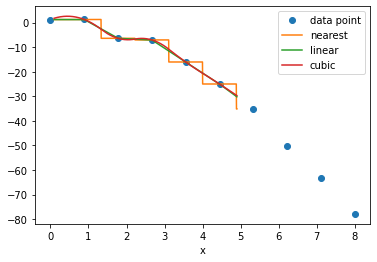

In [15]:
import numpy as np
import scipy.interpolate
import pylab
import math
import random

def create_data(n, xmin, xmax):
    """Given an integer n, returns n data points
    x and values y as a numpy.array."""
    x = np.linspace(xmin, xmax, n)
    y =  (x **2)
    y = (y-0.8)/(-0.8)
    #make x-data somewhat irregular
    y += 1.5 * np.random.normal(size=len(x))
    return x, y

def get_data_X(ymin, ymax):
    xmin = 0
#main program
n = 10
x, y = create_data(n, 0, 8)

#use finer and regular mesh for plot
xfine = np.linspace(0.1, 4.9, n * 100)
#interpolate with piecewise constant function (p=0)
y0 = scipy.interpolate.interp1d(x, y, kind='nearest')
#interpolate with piecewise linear func (p=1)
y1 = scipy.interpolate.interp1d(x, y, kind='linear')
#interpolate with piecewise constant func (p=2)
y2 = scipy.interpolate.interp1d(x, y, kind='quadratic')


pylab.plot(x, y, 'o', label='data point')
pylab.plot(xfine, y0(xfine), label='nearest')
pylab.plot(xfine, y1(xfine), label='linear')
pylab.plot(xfine, y2(xfine), label='cubic')
pylab.legend()
pylab.xlabel('x')

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.          1.05263158  2.10526316  3.15789474  4.21052632  5.26315789
  6.31578947  7.36842105  8.42105263  9.47368421 10.52631579 11.57894737
 12.63157895 13.68421053 14.73684211 15.78947368 16.84210526 17.89473684
 18.94736842 20.        ]
200
200
200
[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False

Text(0.5, 0, 'x')

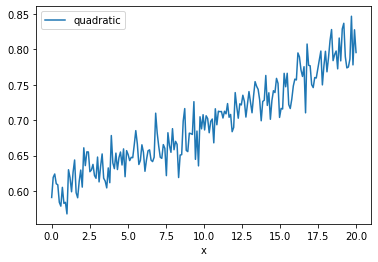

In [133]:
random.seed(42)
noise = np.random.normal(0, 0, 20)
print(noise)
y = np.geomspace(0.6, 0.8, 20) + noise
x = np.linspace(0, 20, 20)
print(x)
#use finer and regular mesh for plot
xfine = np.linspace(0, 20, 200)
#interpolate with piecewise constant function (p=0)
y0 = (scipy.interpolate.interp1d(x, y, kind='nearest')(xfine))  
#interpolate with piecewise linear func (p=1)
y1 = (scipy.interpolate.interp1d(x, y, kind='linear')(xfine)) 
#interpolate with piecewise constant func (p=2)
y2 = (scipy.interpolate.interp1d(x, y, kind='cubic')(xfine)) 
y3 = (scipy.interpolate.interp1d(x, y, kind='quadratic')(xfine)) + np.random.normal(0, abs(0.6 - 0.8) / 10, 200)
print(len(y1))
print(len(y2))
print(len(y0))
print(y1 == y2)
# pylab.plot(x, y, 'o', label='data point')
# pylab.plot(xfine, y0, label='nearest')
# pylab.plot(xfine, y1, label='linear')
# pylab.plot(xfine, y2, label='cubic')
pylab.plot(xfine, y3, label='quadratic')

pylab.legend()
pylab.xlabel('x')

1000
[  0.           0.1001001    0.2002002    0.3003003    0.4004004
   0.5005005    0.6006006    0.7007007    0.8008008    0.9009009
   1.001001     1.1011011    1.2012012    1.3013013    1.4014014
   1.5015015    1.6016016    1.7017017    1.8018018    1.9019019
   2.002002     2.1021021    2.2022022    2.3023023    2.4024024
   2.5025025    2.6026026    2.7027027    2.8028028    2.9029029
   3.003003     3.1031031    3.2032032    3.3033033    3.4034034
   3.5035035    3.6036036    3.7037037    3.8038038    3.9039039
   4.004004     4.1041041    4.2042042    4.3043043    4.4044044
   4.5045045    4.6046046    4.7047047    4.8048048    4.9049049
   5.00500501   5.10510511   5.20520521   5.30530531   5.40540541
   5.50550551   5.60560561   5.70570571   5.80580581   5.90590591
   6.00600601   6.10610611   6.20620621   6.30630631   6.40640641
   6.50650651   6.60660661   6.70670671   6.80680681   6.90690691
   7.00700701   7.10710711   7.20720721   7.30730731   7.40740741
   7.50750751  

Text(0.5, 0, 'x')

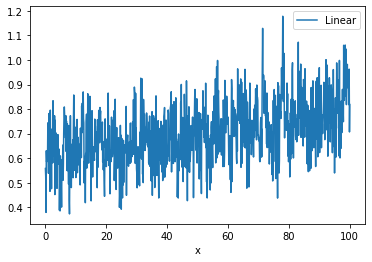

In [143]:
random.seed(42)
def get_feature_data(start, end, space, trend, noise, total_points):
    
    # The len of the values that are generated using numpy
    if total_points < 10:
        initial_space_len =  total_points
    else:
        initial_space_len =  total_points // 10

    # Create Random noise distribution, where std selected by user
    if noise != 0:
        noise = np.random.normal(0, noise, initial_space_len)

    if space == 'Linear':
        y = np.linspace(start, end, initial_space_len) + noise
    else:
        y = np.geomspace(start, end, initial_space_len) + noise

    x = np.linspace(0, initial_space_len, initial_space_len)
    
    #use finer and regular mesh for plot
    xfine = np.linspace(0, initial_space_len, total_points)
    print(len(xfine))
    if trend == 'Nearest':
        #interpolate with piecewise nearest function (p=0)
        y = (scipy.interpolate.interp1d(x, y, kind='nearest')(xfine))  
    elif trend == 'Linear':
        #interpolate with piecewise linear func (p=1)
        y = (scipy.interpolate.interp1d(x, y, kind='linear')(xfine)) 
    elif trend == 'Cubic':
        #interpolate with piecewise cubic func (p=2)
        y = (scipy.interpolate.interp1d(x, y, kind='cubic')(xfine)) 
    else:    
        #interpolate with piecewise qudratic func (p=2) with additional noise
        y = (scipy.interpolate.interp1d(x, y, kind='quadratic')(xfine)) + np.random.normal(0, abs(start - end) / 2, total_points)
    return xfine, y

x, y = get_feature_data(0.6, 0.8, 'Geometric', 'Quadratic',0.05 ,1000)
print(x)
pylab.plot(x, y, label='Linear')


pylab.legend()
pylab.xlabel('x')